In [1]:
from qtn.bimax import BiMax
from qtn.util import f1, j0
from qtn.bimax_util import z_b, j02
import numpy as np
from sympy.mpmath import mp,fp
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
ant_len = 50      # m (monopole) 
ant_rad = 1.9e-4  # m
base_cap = 20e-12 # Farad
al_ratio = ant_rad / ant_len
print(al_ratio)

3.8e-06


In [196]:
# integrand of Za
def integrand_za(z, wc, l, n, t):
    kl = wc*l/fp.sqrt(2)/z
    ka = kl * al_ratio
    num = f1(kl) * j0(ka)**2
    denom = z**2 * BiMax.d_l(z, wc, n, t)
    return num/denom

def integrand_za_small_arg(z, wc, l, n, t):
    kl = wc*l/mp.sqrt(2)/z
    ka = kl * al_ratio
#     f1_kl = mp.pi/kl/4
    f1_kl = f1(kl)
    num = f1_kl * j02(ka)
#     print('z = ', z, 'ka =', ka)
    el_re = 1 + 2 * (1+n/t)*z**2 / wc**2
    el_imag = 2*mp.sqrt(mp.pi) * z**3 / wc**2 * (1 + n/t/mp.sqrt(t))
    denom = z**2 * mp.mpc(el_re, el_imag)
    return num/denom



In [232]:
wrel, l, n, t, tc = 5, 5, 0.1, 10, 1
wc = wrel * np.sqrt(1 + n)


In [233]:
mp.dps = 15
z1 = 0
z2 = 0.01
limits = [z1, z2]

int1 = mp.quad(lambda z: integrand_za(z, wc, l, n, t), limits)
int2 = mp.quad(lambda z: integrand_za_small_arg(z, wc, l, n, t), limits)
print(int1)
print(int2)


(0.215029667691221 - 1.82499181410424e-9j)
(0.215029578486408 - 1.82510098578731e-9j)


In [234]:
mp.dps = 35
int1 = mp.quad(lambda z: integrand_za(z, wc, l, n, t), limits)
print(int1)

(0.21483099454280894143268879268580935 - 0.0000000018249918483627092750163615823172328j)


In [194]:
mp.dps = 35
int1 = mp.quad(lambda z: integrand_za_small_arg(z, wc, l, n, t), limits)
print(int1)

(19.981301940727887884883663766102677 - 0.00025116517918663085415894141690796107j)


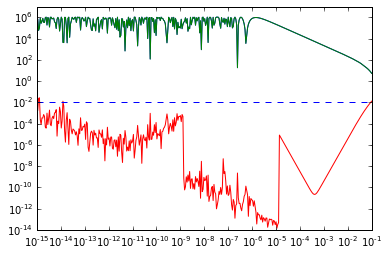

In [197]:
mp.dps = 15
z_arr = np.logspace(-15, -1, 400)
dl_arr = np.array([integrand_za(z, wc, l, n, t).real for z in z_arr])
dl_arr_2 = np.array([integrand_za_small_arg(z, wc, l, n, t).real for z in z_arr\
])
diff = np.array([mp.fabs(d) for d in (dl_arr - dl_arr_2)])
plt.plot(z_arr, dl_arr, 'b')
plt.plot(z_arr, dl_arr_2, 'g')
plt.plot(z_arr, diff/dl_arr, 'r')
plt.xscale('log')
plt.yscale('log')
#plt.axvline(z0,linestyle = 'dashed')
plt.axhline(0.01,linestyle = 'dashed')
#plt.ylim([1e-10,1e5])

In [98]:
mp.dps = 15
limits = [0.01, 1]
int1 = mp.quad(lambda z: integrand_za(z, wc, l, n, t), limits)
print(int1)

(0.869019783230439 - 0.0613907753650046j)
